# TensorFlow: Evaluating & Prediction

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

# Build Model

In [3]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [4]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [5]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess

데이터셋 불러오기 

In [6]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [7]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

# Training

In [8]:
num_epochs = 1
batch_size = 64

In [9]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True)

Train on 60000 samples
60000/60000 [==============================] - 193s 3ms/sample - loss: 0.2150 - accuracy: 0.9315


In [10]:
hist.history

{'loss': [0.2150146810621023], 'accuracy': [0.93146664]}

# Evaluating  
- 학습한 모델 확인

In [12]:
model.evaluate(test_x, test_y, batch_size=batch_size)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.04317164938189089, 0.9846]

### 결과 확인

Input으로 들어갈 이미지 데이터 확인

In [13]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [14]:
test_image = test_x[0, :, :, 0]
test_image.shape

(28, 28)

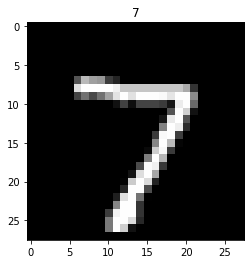

In [15]:
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

- 모델에 Input Data로 확인 할 이미지 데이터 넣기

In [16]:
pred = model.predict(test_image.reshape(1, 28, 28, 1))

In [17]:
pred.shape

(1, 10)

In [18]:
pred

array([[2.8599164e-08, 6.5154580e-08, 7.2498523e-07, 1.6042935e-06,
        9.3459800e-09, 5.9724208e-09, 1.2380655e-12, 9.9998271e-01,
        8.2891658e-09, 1.4952187e-05]], dtype=float32)

- np.argmax

In [19]:
np.argmax(pred)

7

## Test Batch

Batch로 Test Dataset 넣기

In [20]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

Batch Test Dataset 모델에 넣기

In [23]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

- 결과 확인

In [24]:
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 4, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

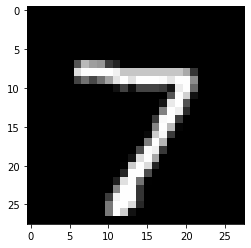

In [29]:
plt.imshow(test_batch[0, :, :, 0], 'gray')
plt.show()